In [1]:
from ensemble_functions import *

In [2]:
np.random.seed(42)

In [3]:
df = pd.read_parquet('../data_export/prueba_ml.parquet')
df.reset_index(inplace=True, drop=True)
df['dia_semana'] = df['fecha'].dt.weekday + 1
year = 2023
us_holidays = holidays.US(years=year)
df['holiday'] = np.where(df['fecha'].isin(us_holidays), 1, 0)
df['rain'] = df['rain'].shift(1)
df['snowfall'] = df['snowfall'].shift(1)
df.fillna(0.0, inplace=True)
df['datetime'] = pd.to_datetime(df['fecha'].astype(str) + ' ' + df['hora'].astype(int).astype(str) + ':00:00')
df.drop(columns='fecha', inplace=True)
df.set_index('datetime', inplace=True)

In [4]:
ensemble, ensemble_predictions, ensemble_errors, ponderacion = train_ensemble(df, verbose=1, file='ensemble_prueba_3.joblib')

Comienzo del entrenamiento del ensemble
Inicio de construcción modelo LSTM


8/8 [==============================] - 0s 2ms/step
Finalizada la construcción de LSTM
RMSE por distrito:
{'Bronx': 4.957838214701852, 'Brooklyn': 29.721354874002845, 'Manhattan': 1423.5846389103365, 'Queens': 150.8099367657933, 'Staten Island': 0.29488391230979427}
Inicio de construcción modelo RF
Inicio de evaluación de Bronx
Mejores Hiperparámetros: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
RMSE: 5.081039098605102
-----------------------------------------------------------------------------------------
Inicio de evaluación de Brooklyn
Mejores Hiperparámetros: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
RMSE: 30.704724588767434
-----------------------------------------------------------------------------------------
Inicio de evaluación de Manhattan
Mejores Hiperparámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
RMSE: 584.8809633873138
--------

INFO:tensorflow:Assets written to: C:\Users\alter\AppData\Local\Temp\tmpjh5c8xgy\assets


Ponderacion: lineal
9/9 [==============================] - 0s 3ms/step
Distrito: Bronx
RMSE: 6.522938954648468
Distrito: Brooklyn
RMSE: 16.841425198392155
Distrito: Manhattan
RMSE: 1242.7147008853763
Distrito: Queens
RMSE: 139.6566201337334
Distrito: Staten Island
RMSE: 0.32295361944160933
Ponderacion: exp Alpha: 0.01
9/9 [==============================] - 0s 3ms/step
Distrito: Bronx
RMSE: 6.5236387869583385
Distrito: Brooklyn
RMSE: 16.84077907634104
Distrito: Manhattan
RMSE: 1358.53851976407
Distrito: Queens
RMSE: 138.99910315939294
Distrito: Staten Island
RMSE: 0.32294867376505004
Ponderacion: exp Alpha: 0.1
9/9 [==============================] - 0s 4ms/step
Distrito: Bronx
RMSE: 6.522547753811389
Distrito: Brooklyn
RMSE: 16.93410986726443
Distrito: Manhattan
RMSE: 1304.340420482649
Distrito: Queens
RMSE: 139.10001948849182
Distrito: Staten Island
RMSE: 0.3229490716033432
Ponderacion: exp Alpha: 0.5
9/9 [==============================] - 0s 4ms/step
Distrito: Bronx
RMSE: 6.5177534068

In [5]:
ponderacion

{'tipo': 'lineal', 'alpha': 1}

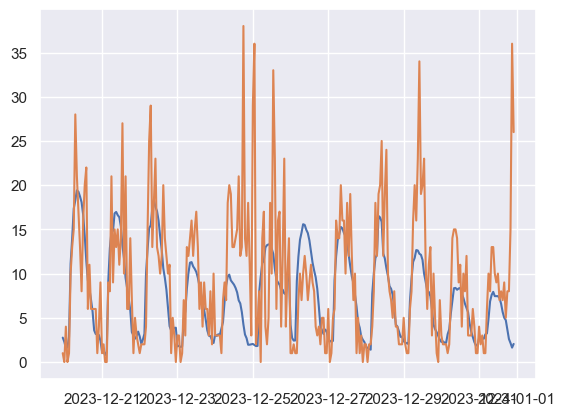

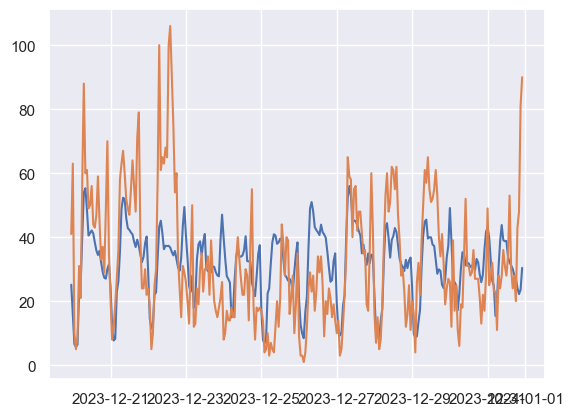

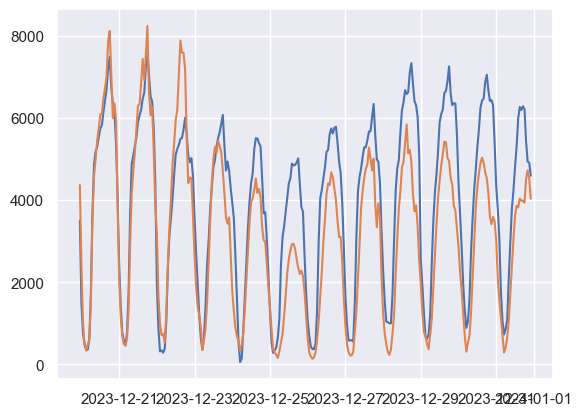

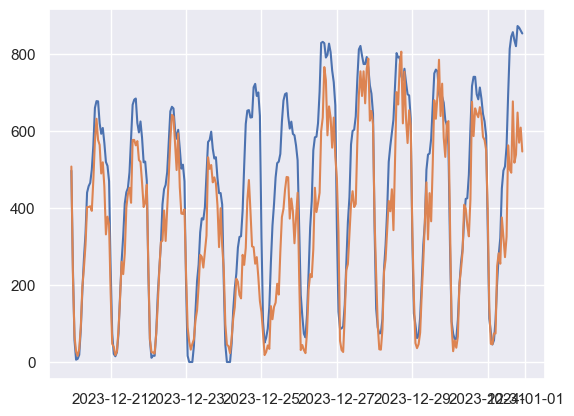

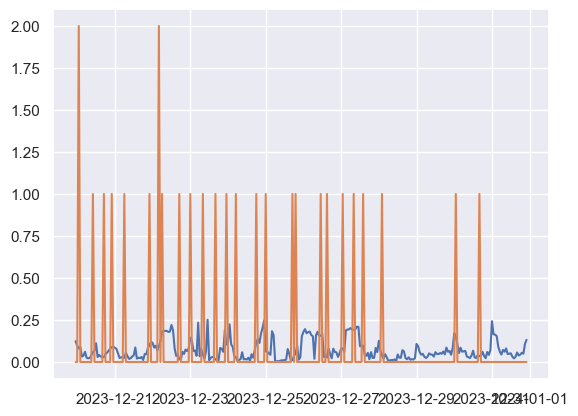

In [10]:
for district in ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']:

    plt.plot(ensemble_predictions['lineal'][district])
    plt.show()